<a href="https://colab.research.google.com/github/AlirezaSamari/Deep-Learning-with_PyTorch/blob/main/2_1_multiple_input_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
torch.manual_seed(1);

Creating Dataset

In [119]:
class Data2D(Dataset):
  def __init__(self):
    self.x = torch.zeros(80, 2)
    self.x[:, 0] = torch.linspace(-2, 2, 80, requires_grad=True)
    self.x[:, 1] = torch.linspace(0, 3, 80, requires_grad=True)
    self.w = torch.tensor([[1.], [1.]])
    self.b = 1
    self.f = torch.mm(self.x, self.w) + self.b
    self.y = self.f + 0.1*torch.randn((self.x.shape[0], 1))
    self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [120]:
dataset = Data2D()
trainingloader = DataLoader(dataset, batch_size=4)

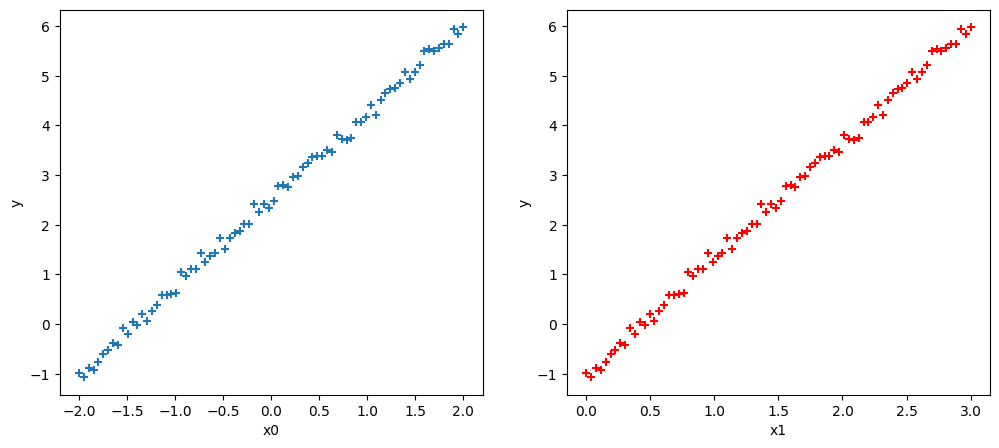

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(dataset.x[:,0].detach().numpy(), dataset.y.detach().numpy(), marker='+')
axs[0].set_xlabel('x0')
axs[0].set_ylabel('y')
axs[1].scatter(dataset.x[:,1].detach().numpy(), dataset.y.detach().numpy(), marker='+', color='red')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('y')
plt.show()

Create the Model, Optimizer, and Total Loss Function

In [139]:
class LR2D(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR2D, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    return self.linear(x)

In [140]:
model = LR2D(dataset.x.shape[1], dataset.y.shape[1])
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.MSELoss()

In [141]:
SGD_loss = []
epochs = 50
iter_arr = np.arange(1, epochs + 1)
def training_model(epochs):
  for epoch in range(epochs):
    Y_hat = model(dataset.x)
    SGD_loss.append(criterion(Y_hat, dataset.y).detach().numpy())
    for x, y in trainingloader:
      y_hat = model(x)
      loss = criterion(y_hat, y)
      optimizer.zero_grad()
      loss.backward(retain_graph = True)
      optimizer.step()
  plt.plot(iter_arr[5:], SGD_loss[5:])
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.show()

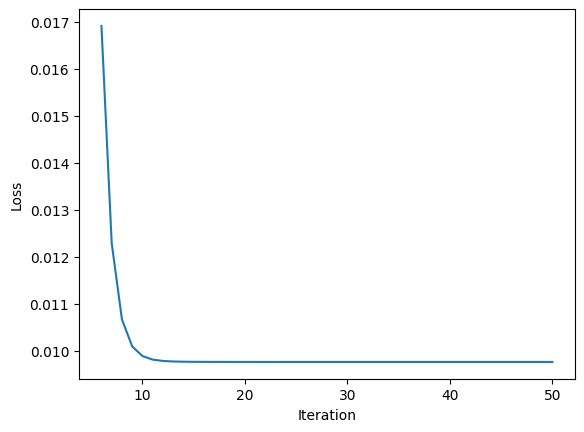

In [142]:
training_model(epochs)